In [11]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from  sklearn.feature_selection import chi2,SelectPercentile,SelectKBest,RFE
from sklearn.decomposition import PCA , TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [12]:
data = pd.read_csv("D:/project/diabetes_prediction_dataset.csv")

In [13]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [14]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe().round(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.08
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [7]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [9]:
data.duplicated().sum()

3854

In [10]:
len(data)

100000

In [11]:
data = data.drop_duplicates()

In [12]:
len(data)

96146

In [16]:
data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [15]:
data['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [26]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])

<Axes: xlabel='diabetes', ylabel='count'>

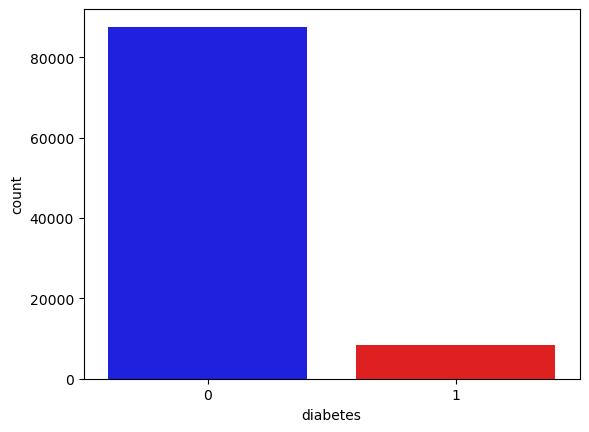

In [15]:
sns.countplot(x='diabetes',data=data,palette=['b','r'])

In [9]:
data['smoking_history'].value_counts()

smoking_history
0    35816
4    35095
3     9352
1     9286
5     6447
2     4004
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

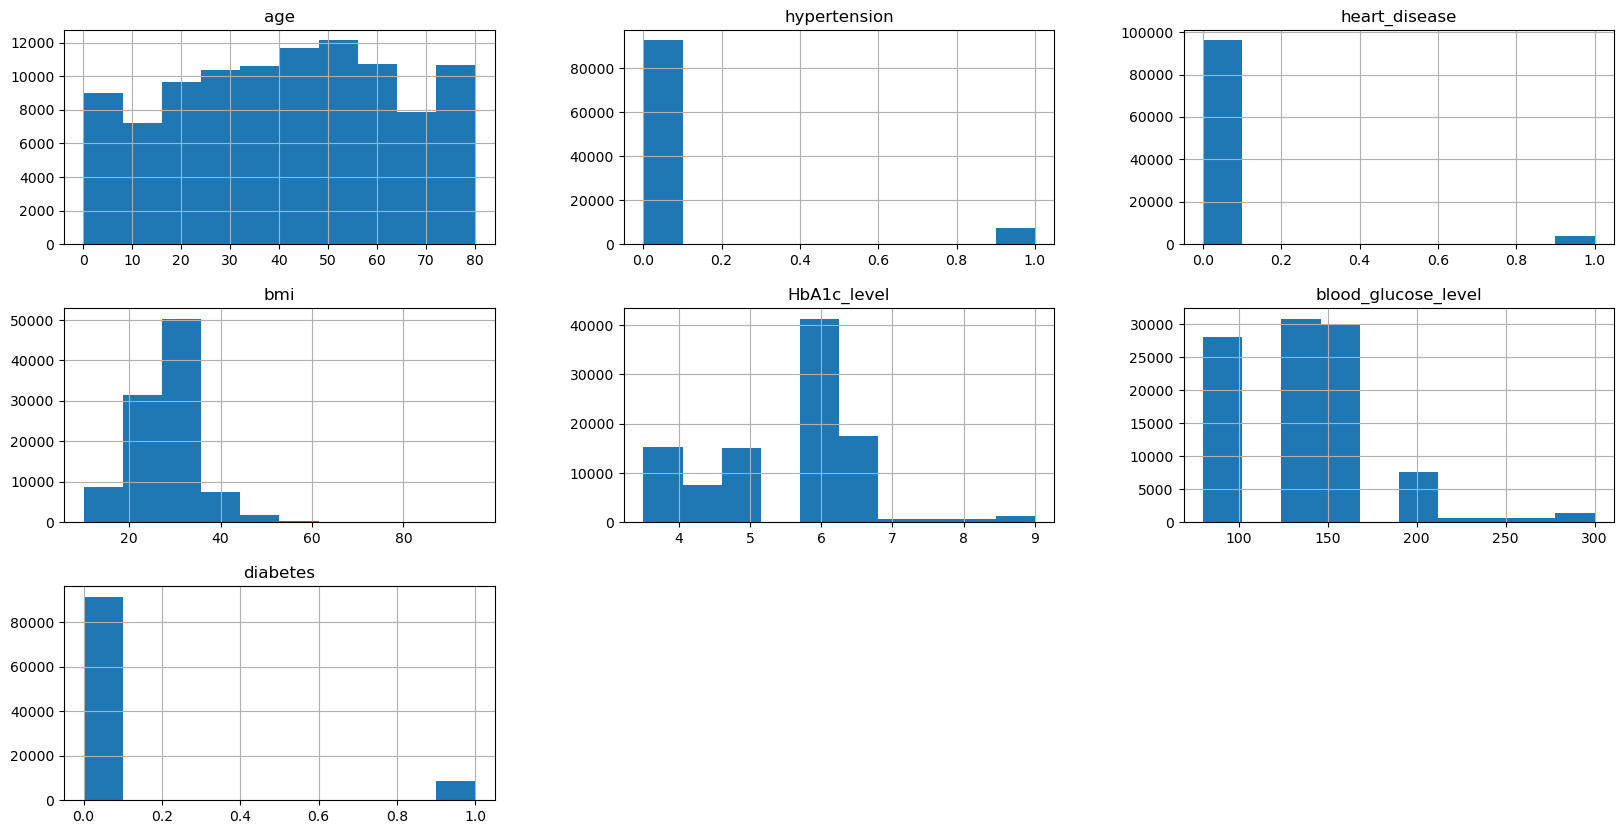

In [17]:
data.hist(figsize=(20,10))

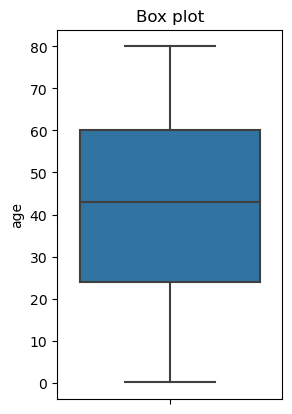

In [18]:
plt.subplot(1,2,1)
plt.title('Box plot')
sns.boxplot(y=data['age'])
plt.show()

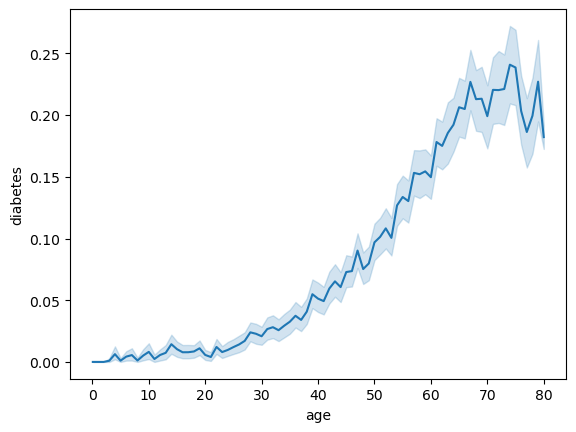

In [24]:
sns.lineplot(x='age', y='diabetes', data=data)
plt.show()

In [29]:
data_corr=data.corr()
data_corr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


<Axes: >

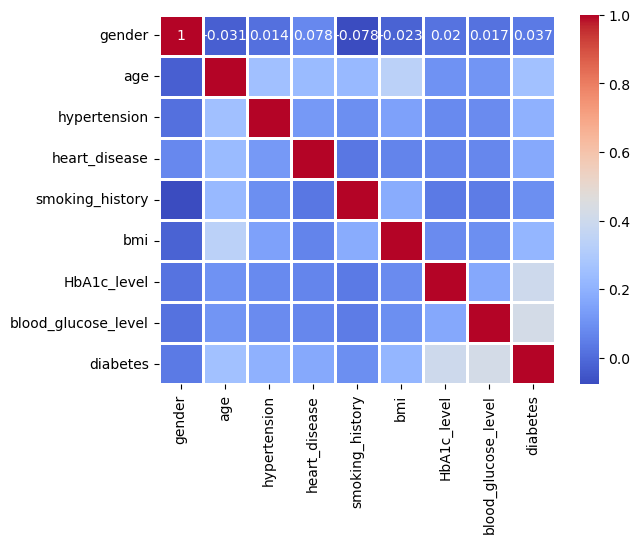

In [31]:
sns.heatmap(data.corr(), linewidths=0.9,annot=True, cmap='coolwarm')

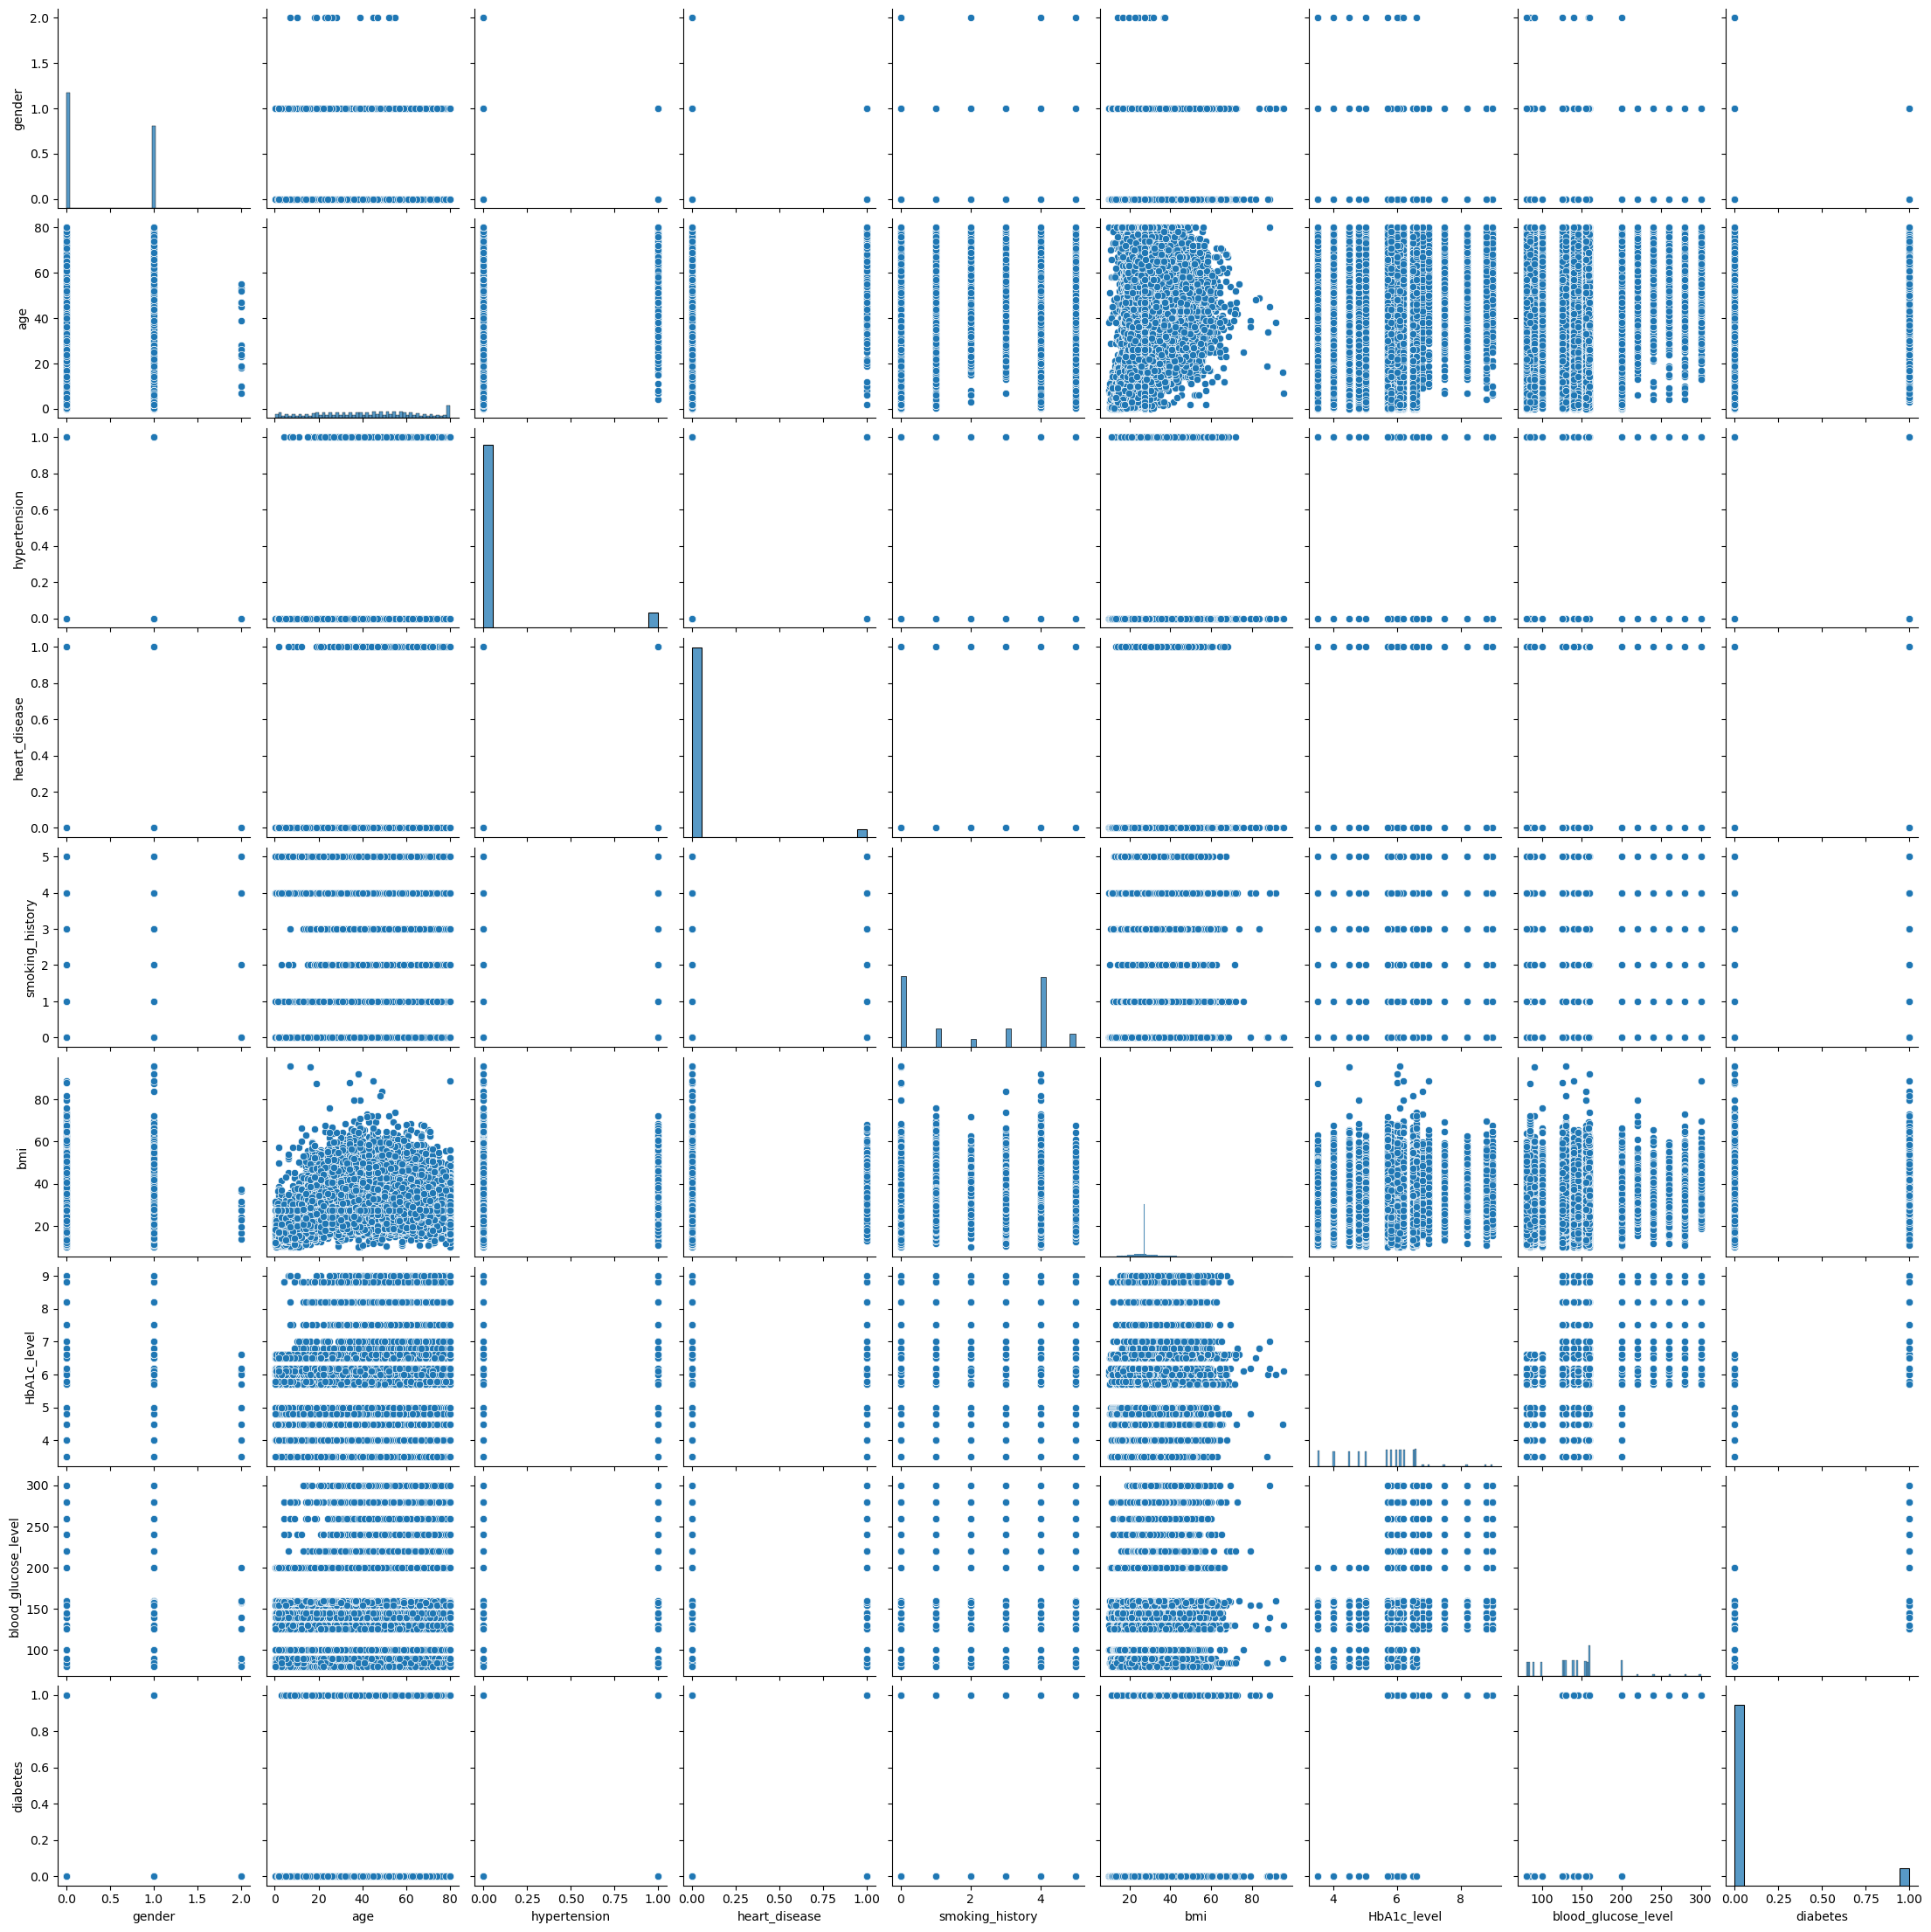

In [35]:
sns.pairplot(data)
plt.show()

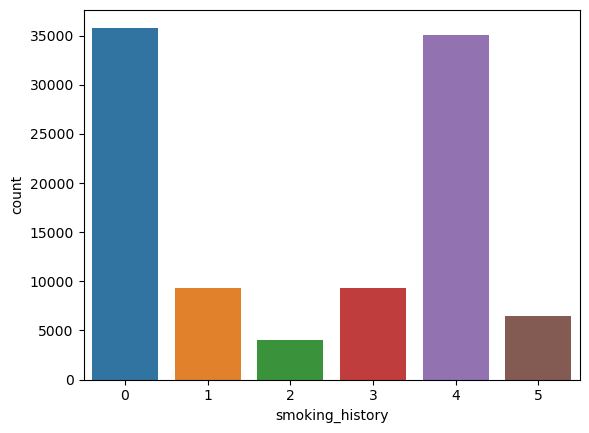

In [38]:
sns.countplot(x='smoking_history', data=data)
plt.show()

In [21]:
x=data.drop('diabetes',axis=1)
y=data['diabetes']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape

(76916, 8)

In [24]:
x_test.shape

(19230, 8)

In [25]:
model1=SVC()
model2=KNeighborsClassifier()

In [86]:
columns=['SVC','KNN']
result1=[]
result2=[]
result3=[]
result4=[]
result5=[]
result6=[]

# filter technique

#  feature selection SelectKBest


In [85]:
def cal(model):
    select=SelectKBest(chi2,k=5)
    x_train_select=select.fit_transform(x_train,y_train)
    x_test_select=select.transform(x_test)

    model.fit(x_train_select, y_train)
    pre = model.predict(x_test_select)
    accuracy = accuracy_score(pre, y_test)
    recall = recall_score(pre, y_test)
    f1 = f1_score(pre, y_test)
    result1.append(accuracy)
    sns.heatmap(confusion_matrix(pre, y_test), annot=True)
    plt.show()

    print(model)
    print('accuracy is:', accuracy, '\n', 'recall is:', recall, '\n', 'f1 score is:', f1)


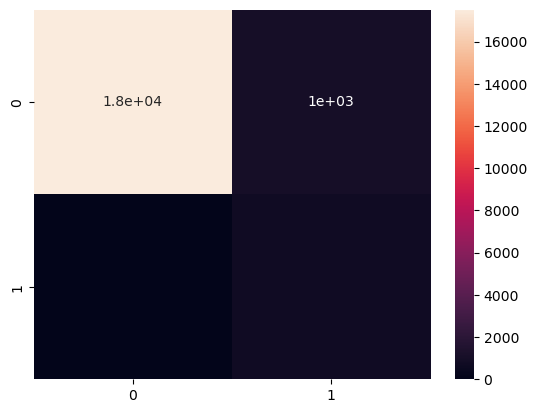

SVC()
accuracy is: 0.9474258970358814 
 recall is: 1.0 
 f1 score is: 0.5841217605923488


In [28]:
cal(model1)

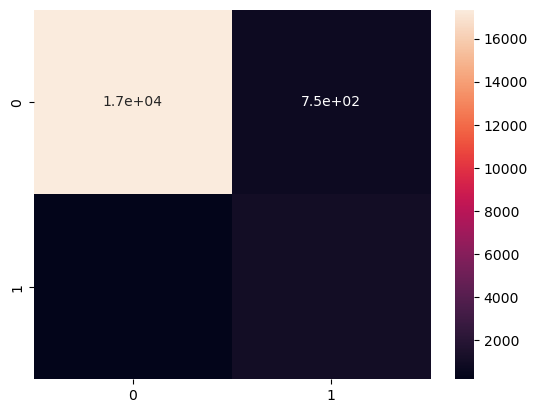

KNeighborsClassifier()
accuracy is: 0.9526261050442018 
 recall is: 0.857773851590106 
 f1 score is: 0.6806869961444095


In [29]:
cal(model2)

# feature selection SelectPercentile

In [30]:
def cal1(model):
    select=SelectPercentile(chi2,percentile=10)
    x_train_select=select.fit_transform(x_train,y_train)
    x_test_select=select.transform(x_test)

    model.fit(x_train_select, y_train)
    pre = model.predict(x_test_select)
    accuracy = accuracy_score(pre, y_test)
    recall = recall_score(pre, y_test)
    f1 = f1_score(pre, y_test)
    result2.append(accuracy)
    sns.heatmap(confusion_matrix(pre, y_test), annot=True)
    plt.show()

    print(model)
    print('accuracy is:', accuracy, '\n', 'recall is:', recall, '\n', 'f1 score is:', f1)


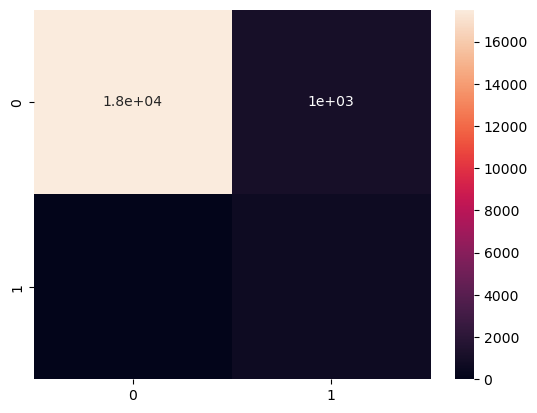

SVC()
accuracy is: 0.9457098283931358 
 recall is: 1.0 
 f1 score is: 0.5646371976647205


In [31]:
cal1(model1)

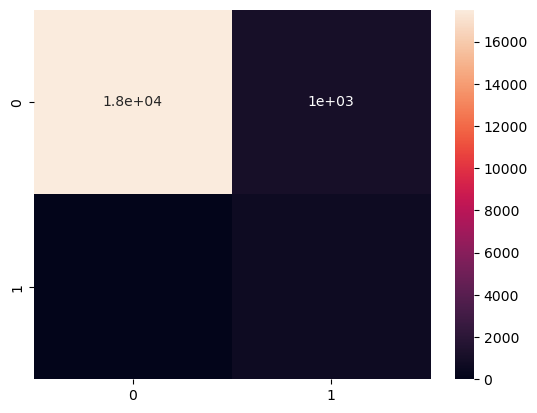

KNeighborsClassifier()
accuracy is: 0.9457098283931358 
 recall is: 1.0 
 f1 score is: 0.5646371976647205


In [32]:
cal1(model2)

In [33]:
result1

[0.9474258970358814, 0.9526261050442018]

In [35]:
result2

[0.9457098283931358, 0.9457098283931358]

In [51]:
final_result=pd.DataFrame({'Algorithm' :columns, 
                           'Accuracy1':result1,
                           'Accuracy2':result2})

# comparison

In [52]:
final_result

,Algorithm,Accuracy1,Accuracy2
0,SVC,0.947426,0.94571
1,KNN,0.952626,0.94571


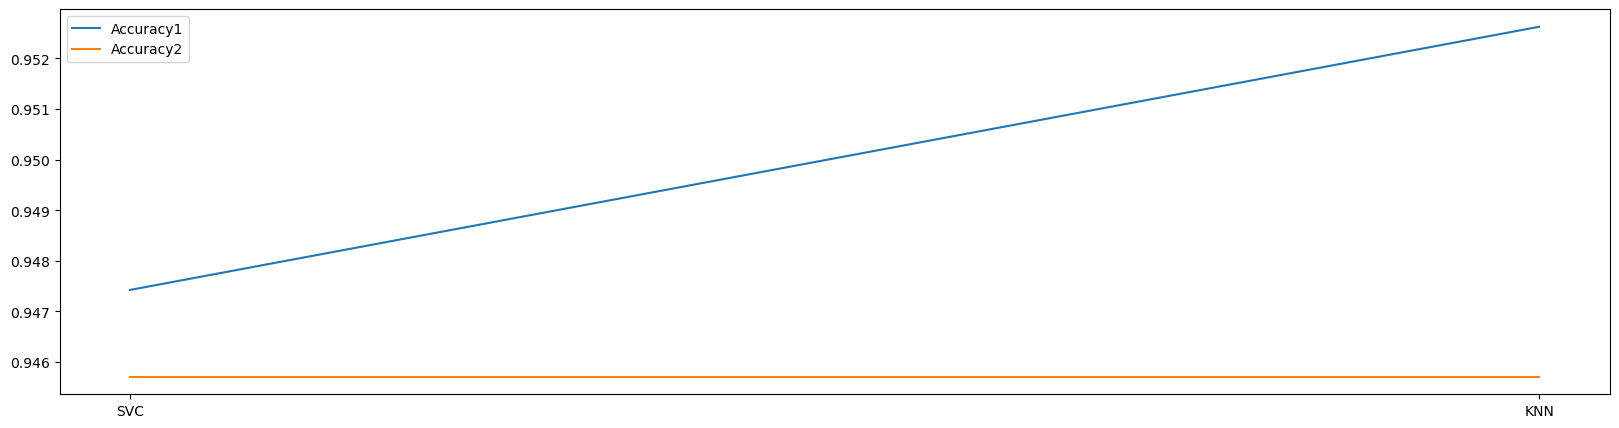

In [50]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorithm,result1,label='Accuracy1')
plt.plot(final_result.Algorithm,result2,label='Accuracy2')
plt.legend()
plt.show()

# wrapper technique

# forward 

In [69]:
forward_selection =SequentialFeatureSelector(SVC(),
                                            k_features=3,
                                            forward=True,
                                            floating=False,
                                            verbose=2,
                                             scoring="accuracy",
                                             cv=5).fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 23.1min finished

[2023-12-11 20:22:11] Features: 1/3 -- score: 0.9523506128439898[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 26.0min finished

[2023-12-11 20:48:12] Features: 2/3 -- score: 0.9457329999629162[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 18.2min finished

[2023-12-11 21:06:25] Features: 3/3 -- score: 0.9457329999629162

In [100]:
result3.append(forward_selection.k_score_)

In [101]:
forward_selection =SequentialFeatureSelector(KNeighborsClassifier(),
                                            k_features=3,
                                            forward=True,
                                            floating=False,
                                            verbose=2,
                                             scoring="accuracy",
                                             cv=5).fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.9min finished

[2023-12-11 22:45:19] Features: 1/3 -- score: 0.91030693109672[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   32.4s finished

[2023-12-11 22:45:52] Features: 2/3 -- score: 0.9622574063074335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.0s finished

[2023-12-11 22:46:15] Features: 3/3 -- score: 0.9679650275785459

In [105]:
forward_selection.k_score_

0.9679650275785459

In [110]:
result3

[0.9457329999629162, 0.9679650275785459]

# backward

In [112]:
forward_selection =SequentialFeatureSelector(SVC(),
                                            k_features=3,
                                            forward=False,
                                            floating=False,
                                            verbose=2,
                                             scoring="accuracy",
                                             cv=5).fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 22.5min finished

[2023-12-11 23:26:35] Features: 7/3 -- score: 0.945472976885662[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 20.1min finished

[2023-12-11 23:46:41] Features: 6/3 -- score: 0.9456159902119936[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 17.5min finished

[2023-12-12 00:04:09] Features: 5/3 -- score: 0.9459800216750267[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [113]:
forward_selection.k_score_

0.9457329999629162

In [114]:
result4.append(forward_selection.k_score_)

In [115]:
forward_selection =SequentialFeatureSelector(KNeighborsClassifier(),
                                            k_features=3,
                                            forward=False,
                                            floating=False,
                                            verbose=2,
                                             scoring="accuracy",
                                             cv=5).fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   41.9s finished

[2023-12-12 00:36:23] Features: 7/3 -- score: 0.9578241039022046[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   36.9s finished

[2023-12-12 00:37:00] Features: 6/3 -- score: 0.9635186240837139[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   32.4s finished

[2023-12-12 00:37:33] Features: 5/3 -- score: 0.9662748610965046[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [116]:
forward_selection.k_score_

0.9679650275785459

In [117]:
result4.append(forward_selection.k_score_)

In [118]:
result3

[0.9457329999629162, 0.9679650275785459]

In [119]:
result4

[0.9457329999629162, 0.9679650275785459]

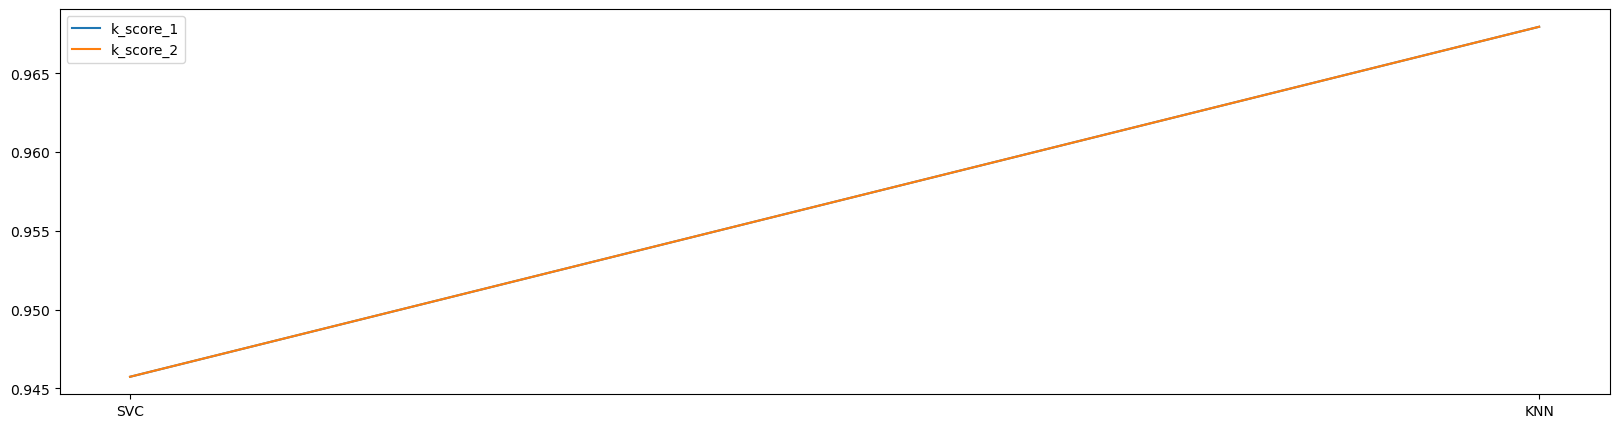

In [120]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorithm,result3,label='k_score_1')
plt.plot(final_result.Algorithm,result4,label='k_score_2')
plt.legend()
plt.show()

# dimension reduction 

# PCA

In [87]:
def dec(model):
    pca=PCA(n_components=2)
    x_train_pca=pca.fit_transform(x_train)
    x_test_pca=pca.fit_transform(x_test)
    
    model.fit(x_train_pca, y_train)
    pre = model.predict(x_test_pca)
    accuracy = accuracy_score(pre, y_test)
    recall = recall_score(pre, y_test)
    f1 = f1_score(pre, y_test)
    result5.append(accuracy)
    sns.heatmap(confusion_matrix(pre, y_test), annot=True)
    plt.show()

    print(model)
    print('accuracy is:', accuracy, '\n', 'recall is:', recall, '\n', 'f1 score is:', f1)


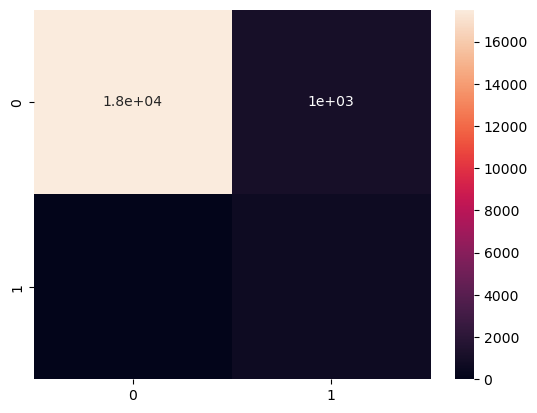

SVC()
accuracy is: 0.9457098283931358 
 recall is: 1.0 
 f1 score is: 0.5646371976647205


In [88]:
dec(model1)

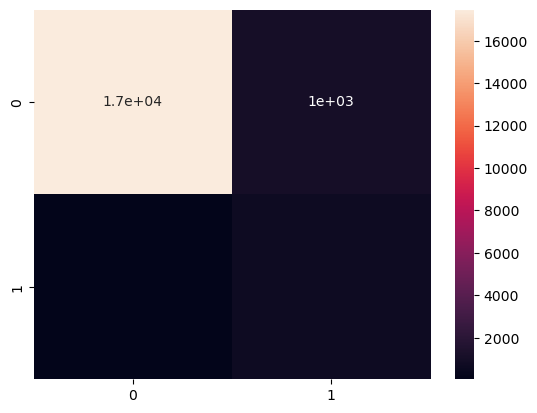

KNeighborsClassifier()
accuracy is: 0.9444097763910556 
 recall is: 0.9465753424657535 
 f1 score is: 0.5638514891880865


In [89]:
dec(model2)

# Truncated Singular Value Decomposition (SVD)

In [90]:
def dec2(model):
    svd=TruncatedSVD(n_components=2)
    x_train_svd=svd.fit_transform(x_train)
    x_test_svd=svd.fit_transform(x_test)
    
    model.fit(x_train_svd, y_train)
    pre = model.predict(x_test_svd)
    accuracy = accuracy_score(pre, y_test)
    recall = recall_score(pre, y_test)
    f1 = f1_score(pre, y_test)
    result6.append(accuracy)
    sns.heatmap(confusion_matrix(pre, y_test), annot=True)
    plt.show()

    print(model)
    print('accuracy is:', accuracy, '\n', 'recall is:', recall, '\n', 'f1 score is:', f1)


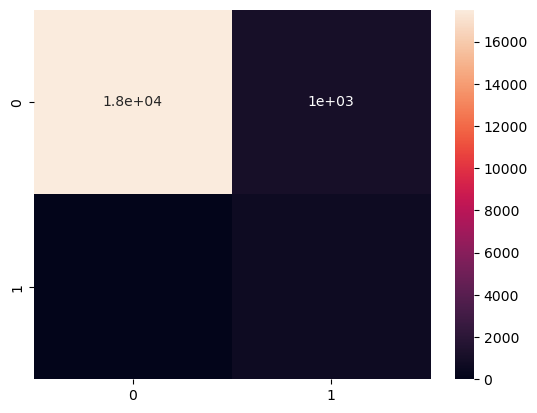

SVC()
accuracy is: 0.9456578263130525 
 recall is: 1.0 
 f1 score is: 0.5640383813099709


In [91]:
dec2(model1)

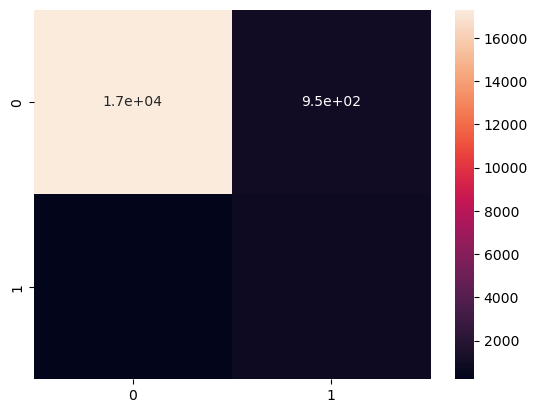

KNeighborsClassifier()
accuracy is: 0.939625585023401 
 recall is: 0.7862985685071575 
 f1 score is: 0.5698406817339756


In [92]:
dec2(model2)

In [94]:
result5

[0.9457098283931358, 0.9444097763910556]

In [95]:
final_result=pd.DataFrame({'Algorithm' :columns, 
                           'Accuracy1':result5,
                           'Accuracy2':result6})

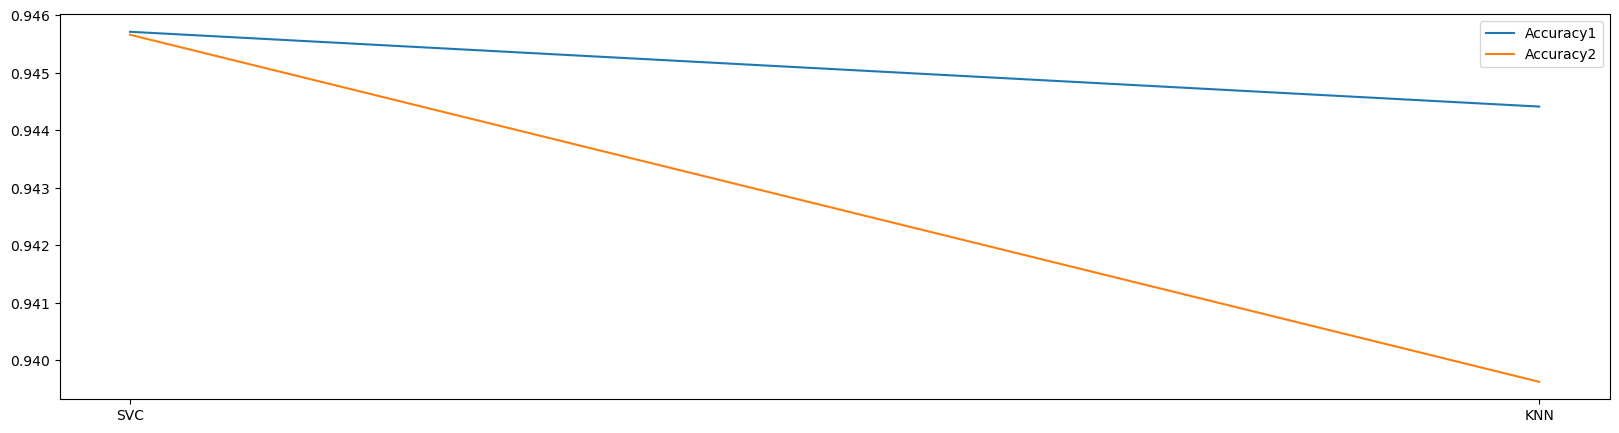

In [97]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorithm,result5,label='Accuracy1')
plt.plot(final_result.Algorithm,result6,label='Accuracy2')
plt.legend()
plt.show()